## Import Packages | k-means Clustering

In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

k-Means is an 'Unsupervised Machine Learning Algorithm' and is: Unsupervised for Clustering, Requires No x/y variables and is Based on the center points of the Data. 

## Import Packages | K-Nearest Neighbors

In [378]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

K-Nearest Neighbors is a 'Supervised Machine Learning Algorithm' and is: Supervised for classification, You do Need to specify an x and y, Based on distance between Data.  

## Financial Datasets - Markets [NASDAQ | DowJones | S&P 500 | US GDP] 

## NASDAQ Dataset | K-means Clustering 

k-Means is an 'Unsupervised Machine Learning Algorithm' and is: Unsupervised for Clustering, Requires No x/y variables and is Based on the center points of the Data.

### Load in Data 

In [379]:
NASDAQ = pd.read_csv("/Users/darringtonhenderson/Documents/GitHub Final/WozUFinalProject/FinalProject/Data/5yrNASDAQ Data.csv")

In [380]:
NASDAQ.head()

,Date,Close/Last,Volume,Open,High,Low
0,04/14/2022,13351.08,--,13647.43,13662.93,13345.22
1,04/13/2022,13643.59,--,13373.12,13679.43,13353.66
2,04/12/2022,13371.57,--,13584.69,13685.95,13317.74
3,04/11/2022,13411.96,--,13547.29,13585.08,13401.39
4,04/08/2022,13711.00,--,13830.47,13866.06,13693.69


In [381]:
NASDAQ.tail()

,Date,Close/Last,Volume,Open,High,Low
1254,04/24/2017,5983.82,--,5979.96,5989.92,5970.25
1255,04/21/2017,5910.52,--,5919.02,5919.23,5899.43
1256,04/20/2017,5916.78,--,5887.87,5926.23,5880.20
1257,04/19/2017,5863.03,--,5874.43,5894.67,5856.34
1258,04/18/2017,5849.47,--,5838.59,5860.04,5828.57


### Data Wrangling 

In [382]:
NASDAQ.drop(['Volume', 'Date'], axis=1, inplace=True)

### Perform k-Means

In [383]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(NASDAQ)

KMeans(n_clusters=2)

### Utilizing k-Means

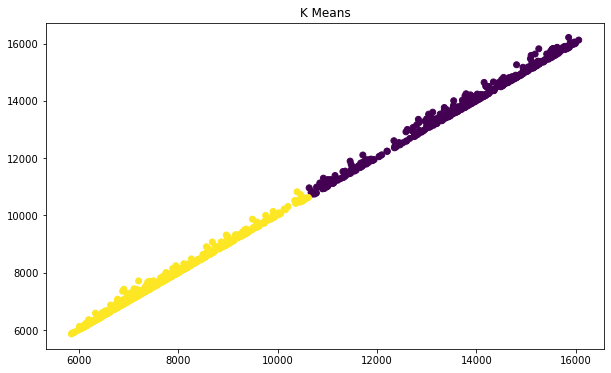

In [384]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(NASDAQ['Close/Last'], NASDAQ['High'], c=kmeans.labels_, cmap='viridis')

In [91]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [92]:
NASDAQ['Group'] = kmeans.labels_

In [93]:
kmeans.cluster_centers_

array([[ 7660.91397576,  7658.74836364,  7707.24162424,  7606.48008485],
       [13604.20221198, 13608.19232719, 13701.59794931, 13492.96082949]])

In [94]:
kmeans.inertia_

6806118852.612963

## NASDAQ Dataset | K-Nearest Neighbors 

K-Nearest Neighbors is a 'Supervised Machine Learning Algorithm' and is: Supervised for classification, You do Need to specify an x and y, Based on distance between Data.  

### Load in Data 

In [156]:
NASDAQ = pd.read_csv("/Users/darringtonhenderson/Documents/GitHub Final/WozUFinalProject/FinalProject/Data/5yrNASDAQ Data.csv")

In [157]:
NASDAQ.head()

,Date,Close/Last,Volume,Open,High,Low
0,04/14/2022,13351.08,--,13647.43,13662.93,13345.22
1,04/13/2022,13643.59,--,13373.12,13679.43,13353.66
2,04/12/2022,13371.57,--,13584.69,13685.95,13317.74
3,04/11/2022,13411.96,--,13547.29,13585.08,13401.39
4,04/08/2022,13711.00,--,13830.47,13866.06,13693.69


In [158]:
NASDAQ.tail()

,Date,Close/Last,Volume,Open,High,Low
1254,04/24/2017,5983.82,--,5979.96,5989.92,5970.25
1255,04/21/2017,5910.52,--,5919.02,5919.23,5899.43
1256,04/20/2017,5916.78,--,5887.87,5926.23,5880.20
1257,04/19/2017,5863.03,--,5874.43,5894.67,5856.34
1258,04/18/2017,5849.47,--,5838.59,5860.04,5828.57


### Goal: Predict 'Highs' of the Markets affects on 'Close/Last' of the Market from the 'Dates' through KNN (K-Nearest Neighbors)

In [159]:
NASDAQTrimmed = NASDAQ.drop(['Volume', 'Date'], axis=1)   

In [160]:
NASDAQTrimmed.head()

,Close/Last,Open,High,Low
0,13351.08,13647.43,13662.93,13345.22
1,13643.59,13373.12,13679.43,13353.66
2,13371.57,13584.69,13685.95,13317.74
3,13411.96,13547.29,13585.08,13401.39
4,13711.00,13830.47,13866.06,13693.69


### Data Wrangling 

In [161]:
scaler = StandardScaler()
scaler.fit(NASDAQTrimmed) 
scaledVariables = scaler.transform(NASDAQTrimmed)
NASDAQScaled = pd.DataFrame(scaledVariables) 

In [162]:
NASDAQScaled.head()

,0,1,2,3
0,1.192018,1.287992,1.263234,1.225296
1,1.287771,1.198270,1.268593,1.228084
2,1.198725,1.267471,1.270711,1.216219
3,1.211947,1.255238,1.237949,1.243849
4,1.309838,1.347861,1.329210,1.340398


### Rename Columns 

In [163]:
NASDAQScaled.rename(columns={0:'Close/Last', 1: 'Open', 2: 'High', 3: 'Low'}, inplace=True) 

In [164]:
NASDAQScaled.head()

,Close/Last,Open,High,Low
0,1.192018,1.287992,1.263234,1.225296
1,1.287771,1.198270,1.268593,1.228084
2,1.198725,1.267471,1.270711,1.216219
3,1.211947,1.255238,1.237949,1.243849
4,1.309838,1.347861,1.329210,1.340398


### Defining x and y variables

In [168]:
x = NASDAQScaled
y = NASDAQ['Date']

### Train test split 

In the Train Test Split the 'Test Size Argument'is the split of Data, 0.3 is a 70/30 split which means we're reserving 30% of our Data for testing. You usually want less Data for 'Testing' than you do for 'Training'. It is best practice to 'Train' on the Bulk of your Data in most cases when possible.   

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

### Analysis and Interpretation 

We are now going to specify how many different Neighbors our Data has. We want to specify exactly the particular number of Neighbors we have and we are going to use this way thats going to pick the best by using a 4-Loop. 

A 4-Loop is going to run through a bunch of different Neighbors and then we are going to graph them. So we can pick what's right.

In [260]:
errorRate = []
for i in range(1,40): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

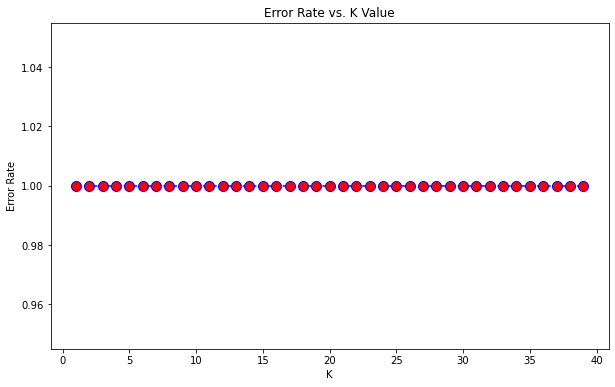

In [171]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In this graph we are suppose to be looking for its absolute lowest point.. but there is no low point in this graph because it's a straight line through.

In [172]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [173]:
print(confusion_matrix(y_test, pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


The numbers in the middle of this Matrix are the accurate and correct numbers from our Algorithm Model in otherwords the true information

In this Model we predict that the "Dates" do not correlate with The Highs and the Low's of the Market at all.

In [174]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

  01/02/2020       0.00      0.00      0.00       1.0
  01/03/2019       0.00      0.00      0.00       0.0
  01/03/2020       0.00      0.00      0.00       0.0
  01/04/2018       0.00      0.00      0.00       1.0
  01/04/2021       0.00      0.00      0.00       1.0
  01/06/2022       0.00      0.00      0.00       1.0
  01/07/2020       0.00      0.00      0.00       1.0
  01/07/2021       0.00      0.00      0.00       1.0
  01/08/2021       0.00      0.00      0.00       1.0
  01/09/2019       0.00      0.00      0.00       1.0
  01/09/2020       0.00      0.00      0.00       0.0
  01/10/2019       0.00      0.00      0.00       0.0
  01/10/2020       0.00      0.00      0.00       1.0
  01/11/2022       0.00      0.00      0.00       1.0
  01/14/2019       0.00      0.00      0.00       1.0
  01/14/2020       0.00      0.00      0.00       0.0
  01/15/2020       0.00      0.00      0.00       1.0
  01/15/2021       0.00    

/Users/darringtonhenderson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/darringtonhenderson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/darringtonhenderson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

## DowJones Dataset | K-means Clustering 

k-Means is an 'Unsupervised Machine Learning Algorithm' and is: Unsupervised for Clustering, Requires No x/y variables and is Based on the center points of the Data.

### Load in Data 

In [220]:
DowJones = pd.read_csv("/Users/darringtonhenderson/Documents/GitHub Final/WozUFinalProject/FinalProject/Data/TheDowData.csv")

In [221]:
DowJones.head()

,Date,Open,High,Low,Close,Volume
0,1896-05-27,29.39,29.39,29.39,29.39,NaN
1,1896-05-28,29.11,29.11,29.11,29.11,NaN
2,1896-05-29,29.43,29.43,29.43,29.43,NaN
3,1896-06-01,29.40,29.40,29.40,29.40,NaN
4,1896-06-02,29.00,29.00,29.00,29.00,NaN


In [222]:
DowJones.tail()

,Date,Open,High,Low,Close,Volume
32611,2022-04-12,34412.51,34669.97,34102.81,34220.36,373804662.0
32612,2022-04-13,34166.64,34598.36,34140.64,34564.59,341268894.0
32613,2022-04-14,34628.46,34889.17,34437.50,34451.23,388476298.0
32614,2022-04-18,34411.49,34618.29,34279.08,34411.69,298634820.0
32615,2022-04-19,34394.62,34983.11,34394.62,34911.20,350100624.0


### Data Wrangling 

In [223]:
DowJones.drop(['Date'], axis=1, inplace=True)

Dropping NaNs from DowJones Data in order for Model to Successfully run 

In [224]:
DowJones.dropna(inplace=True)

### Perform k-Means

In [225]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(DowJones)

KMeans(n_clusters=2)

### Utilizing k-Means

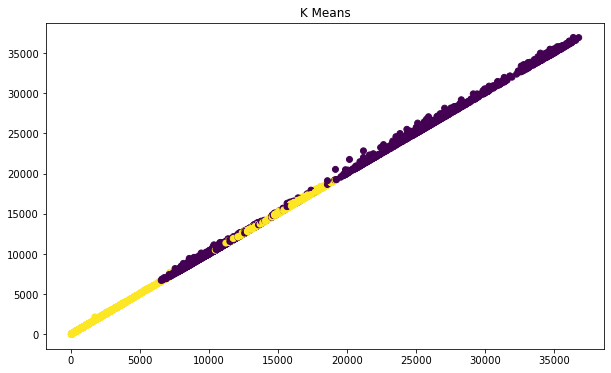

In [226]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(DowJones['Close'], DowJones['High'], c=kmeans.labels_, cmap='viridis')

In [227]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [228]:
DowJones['Group'] = kmeans.labels_

In [229]:
kmeans.cluster_centers_

array([[1.58494219e+04, 1.59487589e+04, 1.57443500e+04, 1.58501947e+04,
        2.80815683e+08],
       [2.16835294e+03, 2.18452380e+03, 2.15261061e+03, 2.16940440e+03,
        1.37482770e+07]])

In [230]:
kmeans.inertia_

6.900784290331556e+19

## DowJones Dataset | K-Nearest Neighbors 


K-Nearest Neighbors is a 'Supervised Machine Learning Algorithm' and is: Supervised for classification, You do Need to specify an x and y, Based on distance between Data.  

### Load in Data 

In [231]:
DowJones = pd.read_csv("/Users/darringtonhenderson/Documents/GitHub Final/WozUFinalProject/FinalProject/Data/TheDowData.csv")

In [232]:
DowJones.head()

,Date,Open,High,Low,Close,Volume
0,1896-05-27,29.39,29.39,29.39,29.39,NaN
1,1896-05-28,29.11,29.11,29.11,29.11,NaN
2,1896-05-29,29.43,29.43,29.43,29.43,NaN
3,1896-06-01,29.40,29.40,29.40,29.40,NaN
4,1896-06-02,29.00,29.00,29.00,29.00,NaN


In [233]:
DowJones.tail()

,Date,Open,High,Low,Close,Volume
32611,2022-04-12,34412.51,34669.97,34102.81,34220.36,373804662.0
32612,2022-04-13,34166.64,34598.36,34140.64,34564.59,341268894.0
32613,2022-04-14,34628.46,34889.17,34437.50,34451.23,388476298.0
32614,2022-04-18,34411.49,34618.29,34279.08,34411.69,298634820.0
32615,2022-04-19,34394.62,34983.11,34394.62,34911.20,350100624.0


### Goal: Predict 'Highs' of the Markets affects on 'Close' of the Market from the 'Dates' through KNN (K-Nearest Neighbors)

In [247]:
DowJonesTrimmed = DowJones.drop(['Date', 'Volume'], axis=1)   

Dropping NaNs from DowJones Data in order for Model to Successfully run 

In [248]:
DowJonesTrimmed.dropna(inplace=True)

In [249]:
DowJonesTrimmed.head()

,Open,High,Low,Close
0,29.39,29.39,29.39,29.39
1,29.11,29.11,29.11,29.11
2,29.43,29.43,29.43,29.43
3,29.40,29.40,29.40,29.40
4,29.00,29.00,29.00,29.00


In [250]:
DowJonesTrimmed.tail()

,Open,High,Low,Close
32611,34412.51,34669.97,34102.81,34220.36
32612,34166.64,34598.36,34140.64,34564.59
32613,34628.46,34889.17,34437.50,34451.23
32614,34411.49,34618.29,34279.08,34411.69
32615,34394.62,34983.11,34394.62,34911.20


### Data Wrangling 

In [258]:
scaler = StandardScaler()
scaler.fit(DowJonesTrimmed) 
scaledVariables = scaler.transform(DowJonesTrimmed)
DowJonesScaled = pd.DataFrame(scaledVariables) 

In [259]:
DowJonesScaled.head()

,0,1,2,3
0,-0.521209,-0.521773,-0.520679,-0.521228
1,-0.521251,-0.521816,-0.520722,-0.521271
2,-0.521203,-0.521767,-0.520673,-0.521222
3,-0.521207,-0.521772,-0.520677,-0.521227
4,-0.521268,-0.521832,-0.520739,-0.521287


### Rename Columns 

In [253]:
DowJonesScaled.rename(columns={0:'Open', 1: 'High', 2: 'Low', 3: 'Close'}, inplace=True) 

In [254]:
DowJonesScaled.head()

,Open,High,Low,Close
0,-0.521209,-0.521773,-0.520679,-0.521228
1,-0.521251,-0.521816,-0.520722,-0.521271
2,-0.521203,-0.521767,-0.520673,-0.521222
3,-0.521207,-0.521772,-0.520677,-0.521227
4,-0.521268,-0.521832,-0.520739,-0.521287


### Defining x and y variables

In [255]:
x = DowJonesScaled
y = DowJones['Date']

### Train test split 

In the Train Test Split the 'Test Size Argument'is the split of Data, 0.3 is a 70/30 split which means we're reserving 30% of our Data for testing. You usually want less Data for 'Testing' than you do for 'Training'. It is best practice to 'Train' on the Bulk of your Data in most cases when possible.

In [256]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

### Analysis and Interpretation 

We are now going to specify how many different Neighbors our Data has. We want to specify exactly the particular number of Neighbors we have and we are going to use this way thats going to pick the best by using a 4-Loop. 

A 4-Loop is going to run through a bunch of different Neighbors and then we are going to graph them. So we can pick what's right.

In [261]:
errorRate = []
for i in range(1,40): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

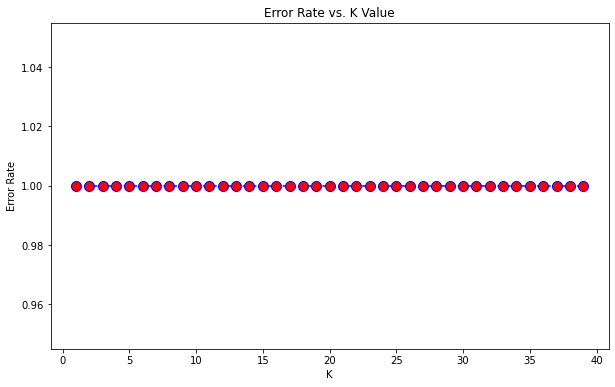

In [262]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In this graph we are suppose to be looking for its absolute lowest point.. but there is no low point in this graph because it's a straight line through.

In [263]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [264]:
print(confusion_matrix(y_test, pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


The numbers in the middle of this Matrix are the accurate and correct numbers from our Algorithm Model in otherwords the true information

In this Model we predict that the "Dates" do not correlate with The Highs and the Low's of the Market at all.

In [265]:
print(classification_report(y_test, pred))

/Users/darringtonhenderson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/darringtonhenderson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/darringtonhenderson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

              precision    recall  f1-score   support

  1896-05-27       0.00      0.00      0.00       1.0
  1896-05-29       0.00      0.00      0.00       1.0
  1896-06-01       0.00      0.00      0.00       1.0
  1896-06-03       0.00      0.00      0.00       1.0
  1896-06-05       0.00      0.00      0.00       1.0
  1896-06-09       0.00      0.00      0.00       1.0
  1896-06-16       0.00      0.00      0.00       0.0
  1896-06-17       0.00      0.00      0.00       1.0
  1896-06-18       0.00      0.00      0.00       1.0
  1896-06-19       0.00      0.00      0.00       1.0
  1896-06-22       0.00      0.00      0.00       1.0
  1896-06-29       0.00      0.00      0.00       0.0
  1896-06-30       0.00      0.00      0.00       1.0
  1896-07-02       0.00      0.00      0.00       0.0
  1896-07-09       0.00      0.00      0.00       1.0
  1896-07-13       0.00      0.00      0.00       0.0
  1896-07-14       0.00      0.00      0.00       1.0
  1896-07-15       0.00    

/Users/darringtonhenderson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/darringtonhenderson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Business Datasets - Closed/Opened  

## Bankrupt Small Businesses Dataset (2) [USA Facts]  | K-means Clustering 

k-Means is an 'Unsupervised Machine Learning Algorithm' and is: Unsupervised for Clustering, Requires No x/y variables and is Based on the center points of the Data.

In [332]:
Bankruptcies2 = pd.read_csv("/Users/darringtonhenderson/Documents/GitHub Final/WozUFinalProject/FinalProject/Data/BankruptciesFiledUSA.csv")

In [333]:
Bankruptcies2.head()

,Years,Bankruptcies filed
0,2010,1596355
1,2011,1467221
2,2012,1261140
3,2013,1107699
4,2014,963739


In [334]:
Bankruptcies2.tail()

,Years,Bankruptcies filed
6,2016,805580
7,2017,790830
8,2018,773375
9,2019,776674
10,2020,612561


### Perform k-Means

In [335]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Bankruptcies2)

KMeans(n_clusters=2)

### Utilizing k-Means

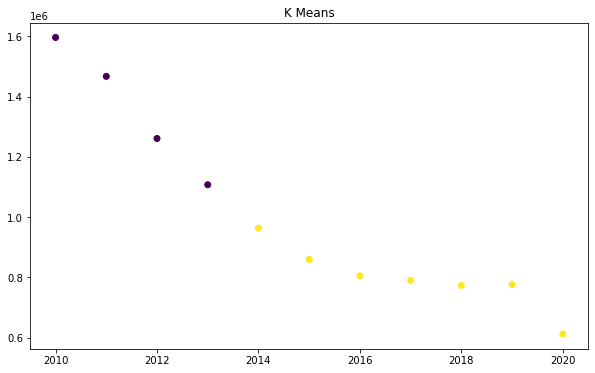

In [339]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(Bankruptcies2['Years'], Bankruptcies2['Bankruptcies filed'], c=kmeans.labels_, cmap='viridis')

In [340]:
kmeans.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [341]:
Bankruptcies2['Group'] = kmeans.labels_

In [342]:
kmeans.cluster_centers_

array([[   2011.5 , 1358103.75],
       [   2017.  ,  797563.  ]])

In [343]:
kmeans.inertia_

207667097427.75

## COVID Cases/Deaths 

## COVID Cases & Deaths CDC Dataset | K-means Clustering 

k-Means is an 'Unsupervised Machine Learning Algorithm' and is: Unsupervised for Clustering, Requires No x/y variables and is Based on the center points of the Data.

In [398]:
covid = pd.read_csv("/Users/darringtonhenderson/Documents/GitHub Final/WozUFinalProject/FinalProject/Data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")

In [399]:
covid.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/18/2021,NE,206980,NaN,NaN,298,0.0,2130,NaN,NaN,1,0.0,03/20/2021 12:00:00 AM,Not agree,Not agree
1,09/01/2021,ND,118491,107475.0,11016.0,536,66.0,1562,NaN,NaN,1,0.0,09/02/2021 01:49:05 PM,Agree,Not agree
2,10/04/2020,MD,127290,NaN,NaN,471,0.0,4092,3933.0,159.0,3,0.0,10/06/2020 12:00:00 AM,NaN,Agree
3,02/06/2020,NE,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,10/06/2021,DE,134690,124148.0,10542.0,444,45.0,1977,1810.0,167.0,2,0.0,10/08/2021 12:00:00 AM,Agree,Agree


In [400]:
covid.tail()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
50476,03/18/2022,NJ,2186846,1888440.0,298406.0,1523,534.0,33155,30172.0,2983.0,6,0.0,03/19/2022 01:30:21 PM,Agree,Agree
50477,07/19/2020,NJ,178541,NaN,NaN,-10,21.0,15706,13732.0,1974.0,34,27.0,07/19/2020 12:00:00 AM,Not agree,Agree
50478,02/10/2021,FSM,1,1.0,0.0,0,0.0,0,0.0,0.0,0,0.0,02/11/2021 02:50:55 PM,Agree,Agree
50479,01/12/2022,WY,123743,97745.0,25998.0,989,246.0,1588,1588.0,0.0,0,0.0,01/13/2022 02:34:51 PM,Agree,Agree
50480,11/22/2021,AZ,1245127,1127692.0,117435.0,3249,403.0,21942,19414.0,2528.0,2,0.0,11/23/2021 02:18:53 PM,Agree,Agree


### Data Wrangling 

In [401]:
covid.drop(['conf_cases', 'submission_date', 'state', 'prob_cases', 'new_case', 'pnew_case', 'conf_death', 'prob_death', 'new_death', 'pnew_death', 'created_at', 'consent_cases', 'consent_deaths'], axis=1, inplace=True)

In [402]:
covid.head()

,tot_cases,tot_death
0,206980,2130
1,118491,1562
2,127290,4092
3,0,0
4,134690,1977


### Perform k-Means

In [403]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(covid)

KMeans(n_clusters=2)

### Utilizing k-Means

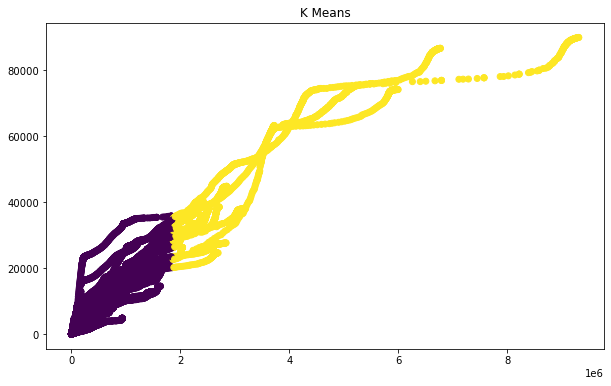

In [404]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(covid['tot_cases'], covid['tot_death'], c=kmeans.labels_, cmap='viridis')

In [405]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [407]:
covid['Group'] = kmeans.labels_

In [408]:
kmeans.cluster_centers_

array([[ 321396.88960973,    5514.67773089],
       [3386394.11789476,   47101.19964912]])

In [409]:
kmeans.inertia_

1.6070177137514416e+16